In [47]:
import pandas as pd
import pymagnitude as m
import numpy as np
import matplotlib.pyplot as plt

In [4]:
EMBEDDINGS = m.Magnitude("../data/cc.nl.300.magnitude")

def embed(sentence):
    """Compute the embedding for a sentence."""
    embedding = np.zeros(300)
    for w in sentence:
        embedding = np.add(embedding, EMBEDDINGS.query(w))
    return embedding

In [44]:
def display_closest_words_tsne_scatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [68]:
terms = pd.read_csv("../data/segmentatie_all_segmentation_files_v3.csv")
terms.columns = [s.lower() for s in terms.columns]
print(len(terms))
terms.head()


129839


,keyword,segment
0,4g mobiel,4G
1,mobiel 4g,4G
2,4g telefoon,4G
3,4g netwerk,4G
4,4g abonnement,4G


In [34]:
sample = terms.sample(100)
keywords = sample.keyword.values
emb_sample = np.array([embed(kw) for kw in sample.keyword.values])

In [42]:
from sklearn.manifold import TSNE

emb_sample_tsne = TSNE(n_components=2).fit_transform(emb_sample)

In [59]:
def plot_embeddings(words, embeddings):
    reduced = TSNE(n_components=2).fit_transform(embeddings) 
    xs = reduced[:,0]
    ys = reduced[:,1]
    plt.scatter(xs, ys)
    for (word, x, y) in zip(words, xs, ys):
        plt.annotate(word, xy=(x, y), xytext=(0, 0), textcoords="offset points")
    
    plt.xlim(xs.min() - 0.05, xs.max() + 0.05)
    plt.ylim(ys.min() - 0.05, ys.max() + 0.05)
    plt.show()

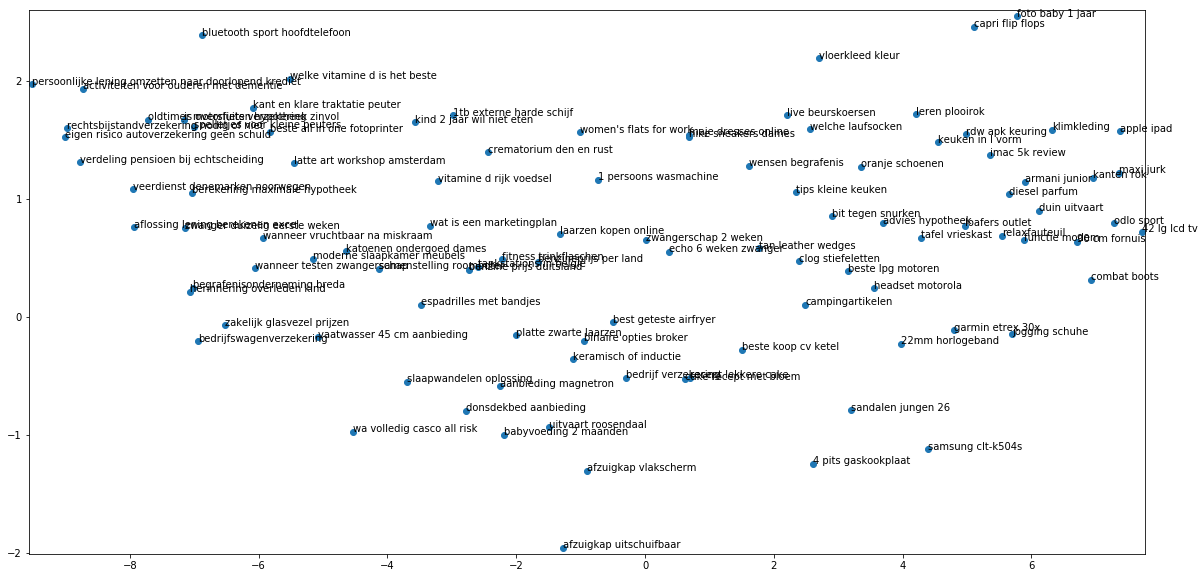

In [64]:
plt.figure(figsize=(20, 10))
plot_embeddings(sample.keyword.values, emb_sample)

In [66]:
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText

In [67]:
# This needs a binary representation
model = FastText.load_fasttext_format("../data/cc.nl.300")

FileNotFoundError: [Errno 2] No such file or directory: '../data/cc.nl.300.vec.bin'